<a href="https://colab.research.google.com/github/fernandovieira1/ML-e-DS-com-Python-de-A-a-Z/blob/master/parte1_classif_knn_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## census

In [ ]:
import os # Oi, VSCode! Aqui e do Colab e quero saber se conseguimos trabalhar juntos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Sim, Colab, sem problemas!

In [ ]:
#### Legal. Mas nao esquece da comentar esta celula se for vc, tudo bem? ####

## Importar o arquivo p/ Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
## Acessar gDrive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2) # valores padrao: se nao passar naa, nao faz diferenca
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8290685772773797

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



0.8290685772773797

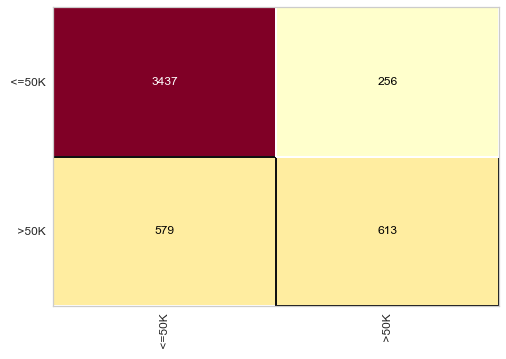

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)